In [2]:
import json
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

base_dir = Path.cwd()
json_dir = base_dir / "results" / "tiempos"

list(json_dir.iterdir())

json_path = json_dir / "tiempos_p123_2025-11-20.json"  

with open(json_path, "r", encoding="utf-8") as f:
    data = json.load(f)

data.keys()

dict_keys(['metadata', 'results'])

In [7]:
rows = []
results = data["results"]
for problema, estrategias in results.items():  
    for estrategia, valores in estrategias.items():
        row = {
            "problema": problema,
            "estrategia": estrategia,
            "s_per_call": valores["s_per_call"],
            "s_total": valores["s_total"],
            "repeticiones": valores["repetitions"],
        }
        rows.append(row)

df = pd.DataFrame(rows)
df

,problema,estrategia,s_per_call,s_total,repeticiones
0,p1,for,3.845900e-03,0.019230,5
1,p1,comp,3.620042e-03,0.018100,5
2,p1,gen,2.915971e-07,0.000001,5
3,p1,numpy,1.583320e-05,0.000079,5
4,p2,for,9.896025e-02,0.296881,3
5,p2,comp,9.504050e-02,0.285121,3
6,p2,gen,9.304124e-02,0.279124,3
7,p2,numpy,2.274723e-04,0.000682,3
8,p3,for,1.966032e-02,0.058981,3
9,p3,comp,3.217693e-02,0.096531,3


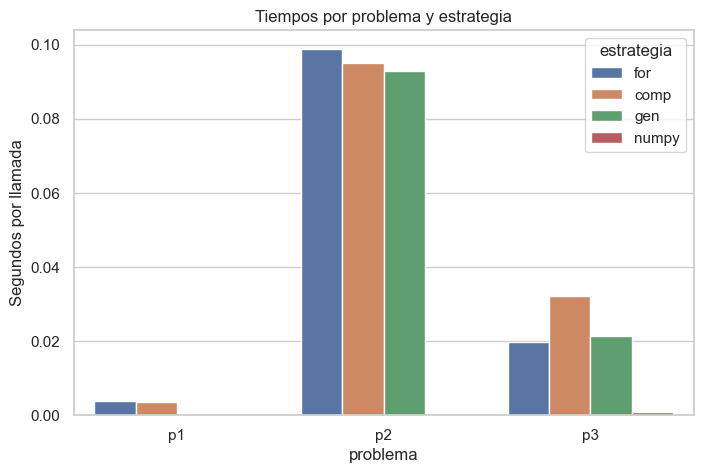

In [9]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.barplot(
    data=df,
    x="problema",
    y="s_per_call",
    hue="estrategia",
    hue_order=["for", "comp", "gen", "numpy"],  # fuerza a usar las 4
)
plt.title("Tiempos por problema y estrategia")
plt.ylabel("Segundos por llamada")
plt.show()


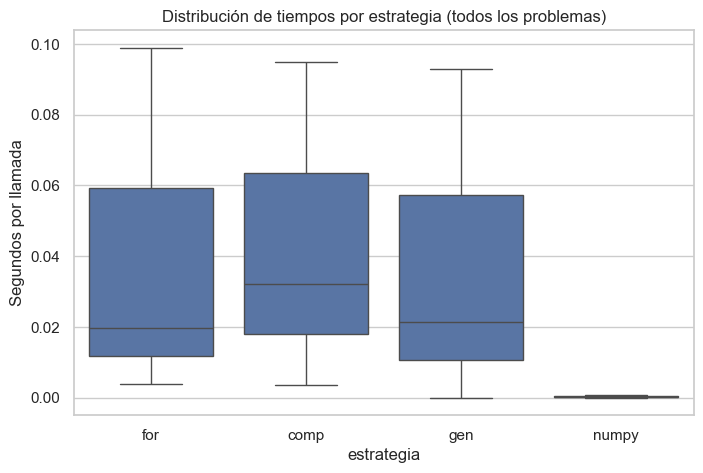

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df,
    x="estrategia",
    y="s_per_call"
)
plt.title("Distribución de tiempos por estrategia (todos los problemas)")
plt.ylabel("Segundos por llamada")
plt.show()


In [12]:
import numpy as np
from proyecto_python import tiempo_p1  

ns = [10_000, 100_000, 1_000_000]
rows_scaling = []

for n in ns:
    t_for, t_comp, t_gen, t_np = tiempo_p1(n=n, num=3)
    rows_scaling.extend([
        {"problema": "p1", "estrategia": "for",   "n": n, "s_per_call": t_for / 3},
        {"problema": "p1", "estrategia": "comp",  "n": n, "s_per_call": t_comp / 3},
        {"problema": "p1", "estrategia": "gen",   "n": n, "s_per_call": t_gen / 3},
        {"problema": "p1", "estrategia": "numpy", "n": n, "s_per_call": t_np / 3},
    ])

df_scaling = pd.DataFrame(rows_scaling)
df_scaling

,problema,estrategia,n,s_per_call
0,p1,for,10000,1.091208e-03
1,p1,comp,10000,1.084278e-03
2,p1,gen,10000,9.723396e-07
3,p1,numpy,10000,3.469434e-05
4,p1,for,100000,7.280250e-03
5,p1,comp,100000,4.864055e-03
6,p1,gen,100000,5.833281e-07
7,p1,numpy,100000,2.131933e-05
8,p1,for,1000000,3.956954e-02
9,p1,comp,1000000,3.631625e-02


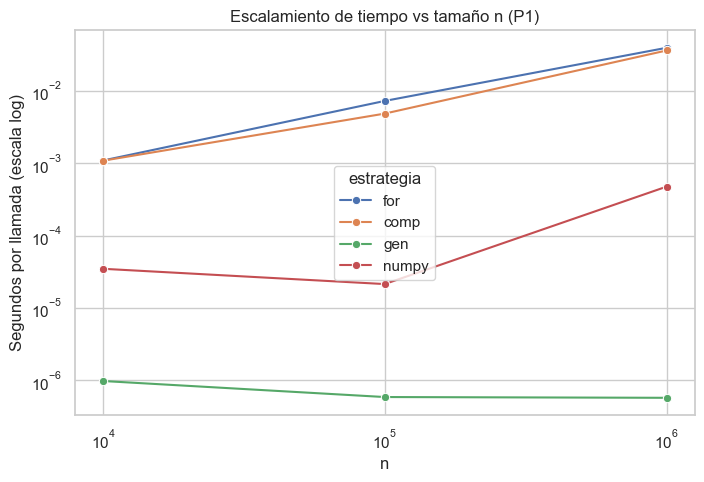

In [13]:
plt.figure(figsize=(8,5))
sns.lineplot(
    data=df_scaling,
    x="n",
    y="s_per_call",
    hue="estrategia",
    marker="o"
)
plt.xscale("log")
plt.yscale("log")
plt.title("Escalamiento de tiempo vs tamaño n (P1)")
plt.ylabel("Segundos por llamada (escala log)")
plt.show()

In [14]:
df_np = df[df["estrategia"] == "numpy"][["problema", "s_per_call"]]
df_np = df_np.rename(columns={"s_per_call": "s_numpy"})

df_ratio = df.merge(df_np, on="problema")
df_ratio["ratio_vs_numpy"] = df_ratio["s_per_call"] / df_ratio["s_numpy"]
df_ratio

,problema,estrategia,s_per_call,s_total,repeticiones,s_numpy,ratio_vs_numpy
0,p1,for,3.845900e-03,0.019230,5,0.000016,242.900997
1,p1,comp,3.620042e-03,0.018100,5,0.000016,228.636136
2,p1,gen,2.915971e-07,0.000001,5,0.000016,0.018417
3,p1,numpy,1.583320e-05,0.000079,5,0.000016,1.000000
4,p2,for,9.896025e-02,0.296881,3,0.000227,435.043008
5,p2,comp,9.504050e-02,0.285121,3,0.000227,417.811243
6,p2,gen,9.304124e-02,0.279124,3,0.000227,409.022200
7,p2,numpy,2.274723e-04,0.000682,3,0.000227,1.000000
8,p3,for,1.966032e-02,0.058981,3,0.000800,24.584362
9,p3,comp,3.217693e-02,0.096531,3,0.000800,40.235832


In [15]:
tabla = df_ratio.pivot(index="problema", columns="estrategia", values="ratio_vs_numpy")
tabla

estrategia,comp,for,gen,numpy
problema,,,,
p1,228.636136,242.900997,0.018417,1.0
p2,417.811243,435.043008,409.022200,1.0
p3,40.235832,24.584362,26.629135,1.0


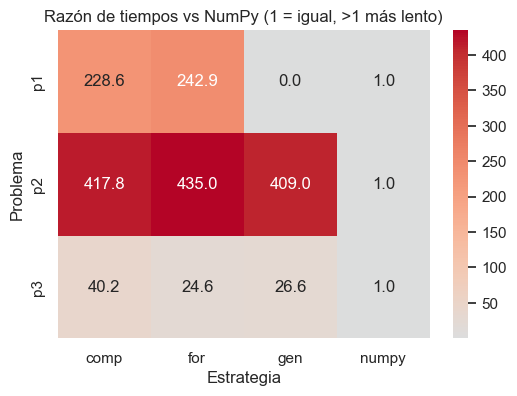

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(
    tabla,
    annot=True,
    fmt=".1f",
    cmap="coolwarm",
    center=1.0
)
plt.title("Razón de tiempos vs NumPy (1 = igual, >1 más lento)")
plt.ylabel("Problema")
plt.xlabel("Estrategia")
plt.show()
